In [27]:
# Imports and setup
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pytesseract
from sklearn.metrics import classification_report

In [28]:
# Load and preprocess images
def load_images_from_folder(folder):
    images = []
    i = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        i += 1
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
        if i%500 == 0:
            print(str(i) + " Images Loaded")
    return images

ads_images = load_images_from_folder('/kaggle/input/advertisement-dataset/Ads Dataset/Ads Dataset/Ads')
print("Loaded Ads Images")
non_ads_images = load_images_from_folder('/kaggle/input/advertisement-dataset/Ads Dataset/Ads Dataset/Non_Ads')
print("Loaded Non-Ads Images")

ads_labels = [1] * len(ads_images)
non_ads_labels = [0] * len(non_ads_images)

500 Images Loaded
1000 Images Loaded
1500 Images Loaded
2000 Images Loaded
2500 Images Loaded
3000 Images Loaded
3500 Images Loaded
4000 Images Loaded
4500 Images Loaded
5000 Images Loaded
5500 Images Loaded
Loaded Ads Images
500 Images Loaded
1000 Images Loaded
1500 Images Loaded
2000 Images Loaded
2500 Images Loaded
3000 Images Loaded
3500 Images Loaded
4000 Images Loaded
4500 Images Loaded
5000 Images Loaded
Loaded Non-Ads Images


In [29]:
images = np.array(ads_images + non_ads_images)
labels = np.array(ads_labels + non_ads_labels)

images = images / 255.0
labels = to_categorical(labels, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [30]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=45, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5276 - loss: 0.7630 - val_accuracy: 0.5948 - val_loss: 1.2090
Epoch 2/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5916 - loss: 0.6766 - val_accuracy: 0.6621 - val_loss: 4.9506
Epoch 3/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6748 - loss: 0.6164 - val_accuracy: 0.7058 - val_loss: 1.3175
Epoch 4/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7231 - loss: 0.5577 - val_accuracy: 0.6908 - val_loss: 0.9452
Epoch 5/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7478 - loss: 0.5228 - val_accuracy: 0.7422 - val_loss: 1.1954
Epoch 6/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7759 - loss: 0.4853 - val_accuracy: 0.7572 - val_loss: 1.0596
Epoch 7/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7807 - loss: 0.4802 - val_accuracy: 0.7640 - val_loss: 1.3942
Epoch 8/45
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8023 - loss: 0.4472 - val_acc

In [33]:
# Feature extraction
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

test_image = X_test[0].reshape(1, 128, 128, 3)
activations = activation_model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


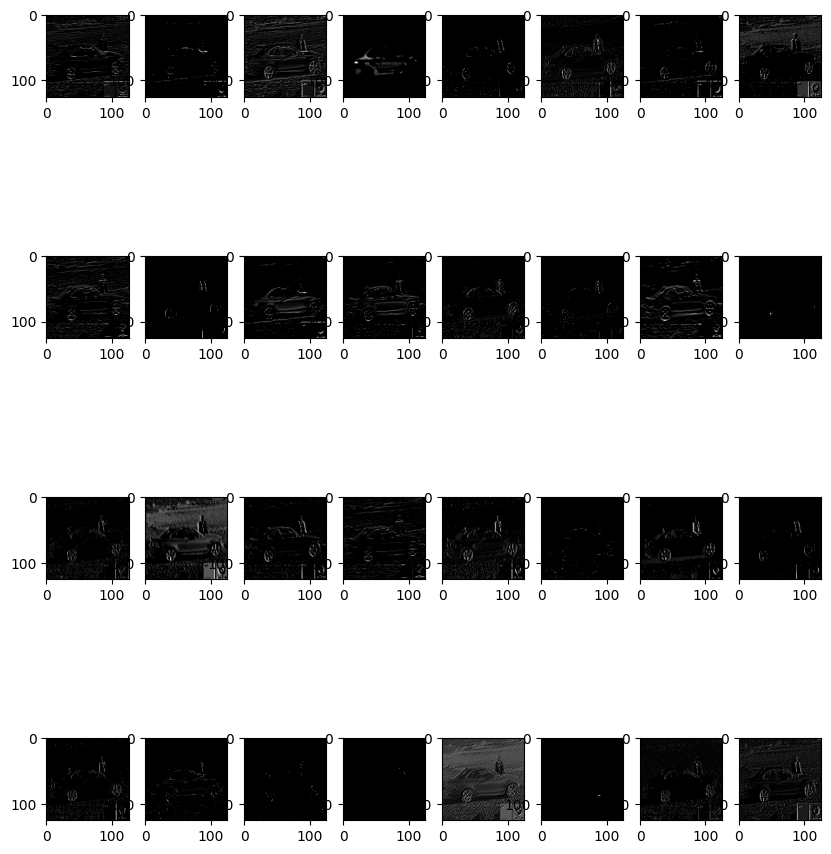

In [34]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

display_activation(activations, 8, 4, 0)

Detected Text:   
   
 

x
raua new AD
COPA 1S

‘MaDe WITH 1
CHEKEN-SHIT.

    
  
 

    



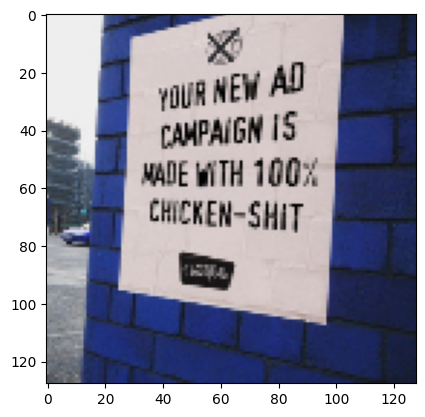

In [35]:
# False positive reduction - text detection
def detect_text(image):
    image = np.uint8(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

# sample_image = X_test[0] * 255
sample_image = cv2.imread("/kaggle/input/advertisement-dataset/Ads Dataset/Ads Dataset/Non_Ads/10406.png")
sample_image = cv2.resize(sample_image, (128, 128))
text = detect_text(sample_image)
print("Detected Text:", text)
plt.imshow(sample_image)

In [36]:
# Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['Non-Ad', 'Ad']))

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

      Non-Ad       0.74      0.73      0.74      1022
          Ad       0.77      0.77      0.77      1177

    accuracy                           0.75      2199
   macro avg       0.75      0.75      0.75      2199
weighted avg       0.75      0.75      0.75      2199



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Non-Ads Prediction :  69.87617015838623
Ads Prediction :  30.12382686138153


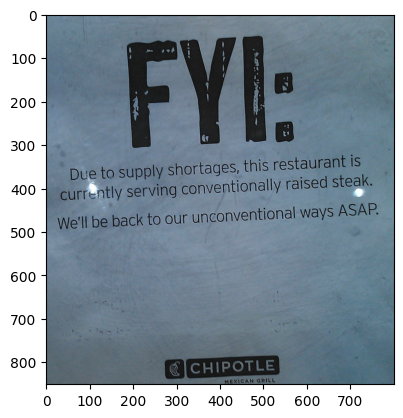

In [37]:
p_img = mg = cv2.imread("/kaggle/input/advertisement-dataset/Ads Dataset/Ads Dataset/Non_Ads/10454.png")
mg = np.array(cv2.resize(mg, (128, 128)))
mg = mg/255.0
mg = mg.reshape(1, 128, 128, 3)
prd = model.predict(mg)
non_ads_per = prd[0,0]
ads_per = prd[0,1]
print("Non-Ads Prediction : ", non_ads_per*100)
print("Ads Prediction : ", ads_per*100)
plt.imshow(p_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Non-Ads Prediction :  1.5412179976692642e-06
Ads Prediction :  100.0


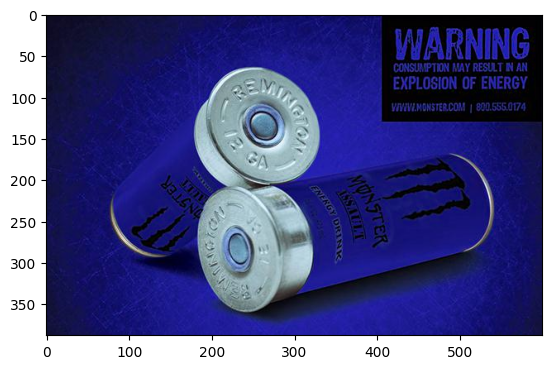

In [38]:
p_img = mg = cv2.imread("/kaggle/input/advertisement-dataset/Ads Dataset/Ads Dataset/Ads/100200.jpg")
mg = np.array(cv2.resize(mg, (128, 128)))
mg = mg/255.0
mg = mg.reshape(1, 128, 128, 3)
prd = model.predict(mg)
non_ads_per = prd[0,0]
ads_per = prd[0,1]
print("Non-Ads Prediction : ", non_ads_per*100)
print("Ads Prediction : ", ads_per*100)
plt.imshow(p_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Non-Ads Prediction :  100.0
Ads Prediction :  3.833681372356068e-07


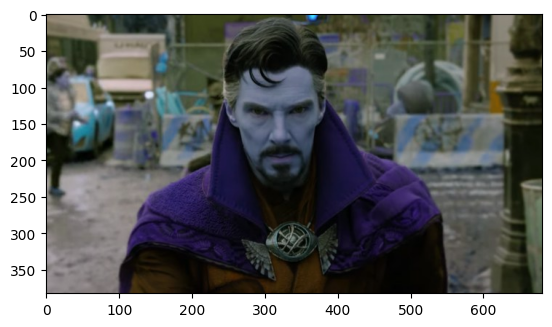

In [39]:
import urllib.request

req = urllib.request.urlopen('https://variety.com/wp-content/uploads/2021/12/doctor-strange.jpg?w=681&h=383&crop=1&resize=681%2C383')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
p_img = mg = cv2.imdecode(arr, -1)
mg = np.array(cv2.resize(mg, (128, 128)))
mg = mg/255.0
mg = mg.reshape(1, 128, 128, 3)
prd = model.predict(mg)
non_ads_per = prd[0,0]
ads_per = prd[0,1]
print("Non-Ads Prediction : ", non_ads_per*100)
print("Ads Prediction : ", ads_per*100)
plt.imshow(p_img)